In [ ]:
import os
import seaborn as sns
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/1mushroom/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/1mushroom/test.csv')
pd.set_option('display.max_columns',len(train.columns))

In [ ]:
train= train.drop_duplicates()

def split(Data,Target,id):
  y=Data[Target].copy()
  x=Data.drop([Target,id],axis=1).copy()
  return x,y
x,y=split(train,'class','id')



In [ ]:
b=0
for i in x.columns:
  counts = train[i].value_counts()  # Step 1: Count occurrences of each value
  single_occurrences = counts[counts == 1].index  # Step 2: Identify values that occur only once

  # Step 3: Replace these values with NaN
  train[i] = train[i].apply(lambda x: np.nan if x in single_occurrences else x)
# i='cap-shape'
# counts = train[i].value_counts()  # Step 1: Count occurrences of each value
# single_occurrences = counts[counts == 7].index  # Step 2: Identify values that occur only once

# # Step 3: Replace these values with NaN
# train[i] = train[i].apply(lambda x: np.nan if x in single_occurrences else x)
# i='cap-color'
# counts = train[i].value_counts()  # Step 1: Count occurrences of each value
# single_occurrences = counts[counts == 7].index  # Step 2: Identify values that occur only once

# # Step 3: Replace these values with NaN
# train[i] = train[i].apply(lambda x: np.nan if x in single_occurrences else x)

# i='gill-color'
# counts = train[i].value_counts()  # Step 1: Count occurrences of each value
# single_occurrences = counts[counts == 7].index  # Step 2: Identify values that occur only once

# # Step 3: Replace these values with NaN
# train[i] = train[i].apply(lambda x: np.nan if x in single_occurrences else x)
# i='stem-color'
# counts = train[i].value_counts()  # Step 1: Count occurrences of each value
# single_occurrences = counts[counts == 3].index  # Step 2: Identify values that occur only once

# # Step 3: Replace these values with NaN
# train[i] = train[i].apply(lambda x: np.nan if x in single_occurrences else x)
# i='has-ring'
# counts = train[i].value_counts()  # Step 1: Count occurrences of each value
# single_occurrences = counts[counts == 16].index  # Step 2: Identify values that occur only once

# # Step 3: Replace these values with NaN
# train[i] = train[i].apply(lambda x: np.nan if x in single_occurrences else x)
# i='does-bruise-or-bleed'
# counts = train[i].value_counts()  # Step 1: Count occurrences of each value
# single_occurrences = counts[counts == 16].index  # Step 2: Identify values that occur only once

# # Step 3: Replace these values with NaN
# train[i] = train[i].apply(lambda x: np.nan if x in single_occurrences else x)
# i='habitat'
# counts = train[i].value_counts()  # Step 1: Count occurrences of each value
# single_occurrences = counts[counts == 3].index  # Step 2: Identify values that occur only once

# # Step 3: Replace these values with NaN
# train[i] = train[i].apply(lambda x: np.nan if x in single_occurrences else x)






In [ ]:
train.head(10)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,NaN,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,NaN,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,NaN,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,NaN,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,NaN,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
5,NaN,p,4.30,x,t,n,f,s,c,n,5.91,8.20,NaN,NaN,w,NaN,n,t,z,NaN,d,a
6,NaN,e,9.65,p,y,w,f,e,c,k,19.07,12.69,NaN,s,w,NaN,NaN,t,e,NaN,g,w
7,NaN,p,4.55,x,e,e,f,a,NaN,y,8.31,9.77,NaN,NaN,y,NaN,w,t,z,NaN,d,a
8,NaN,p,7.36,f,h,e,f,x,d,w,5.77,17.13,b,NaN,w,NaN,NaN,f,f,NaN,d,a
9,NaN,e,6.45,x,t,n,f,a,d,w,7.13,12.77,NaN,NaN,e,NaN,NaN,f,f,NaN,d,a


In [ ]:
# @title info

def describe(df):
  desc=pd.DataFrame()
  desc['dtype']=df.dtypes
  desc['null']=df.isnull().sum()
  desc['%null'] = desc['null'] / len(df) * 100
  # desc['mean']=df.mean()
  # desc['median']=df.median()
  #desc['%unique'] = desc['nunique'] /len(df)*100
  desc = pd.concat([desc,df.describe(include = 'all').T],axis=1).sort_values(by='null',ascending=False)
  desc['count']=df.count()
  desc['unique']=df.nunique()
  # desc['freq/mean']=desc['freq'].fillna(desc['mean']).drop(['freq','mean'],axis=1)
  display(desc)
describe(train)

,dtype,null,%null,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,float64,3116945,100.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
veil-type,object,2957498,94.884510,159447,17,u,159373,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spore-print-color,object,2849691,91.425771,267254,23,k,107310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stem-root,object,2757038,88.453213,359907,23,b,165801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
veil-color,object,2740951,87.937099,375994,20,w,279070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stem-surface,object,1980893,63.552389,1136052,28,s,327610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-spacing,object,1258465,40.374950,1858480,18,c,1331054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-surface,object,671077,21.529960,2445868,29,t,460777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-attachment,object,523989,16.810980,2592956,25,a,646034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ring-type,object,128894,4.135267,2988051,26,f,2477170,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
null_counts= train.isnull().sum()

# Filter columns where null values are below the threshold
selected_columns = null_counts[null_counts < 100].index

In [ ]:
def cat_fea(train):


  unique_counts = train[selected_columns].nunique()
  #Threshold to distinguish continous and categorical
  threshold = 100

  continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
  categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()
  return continuous_vars,categorical_vars


cont,cat=cat_fea(train)

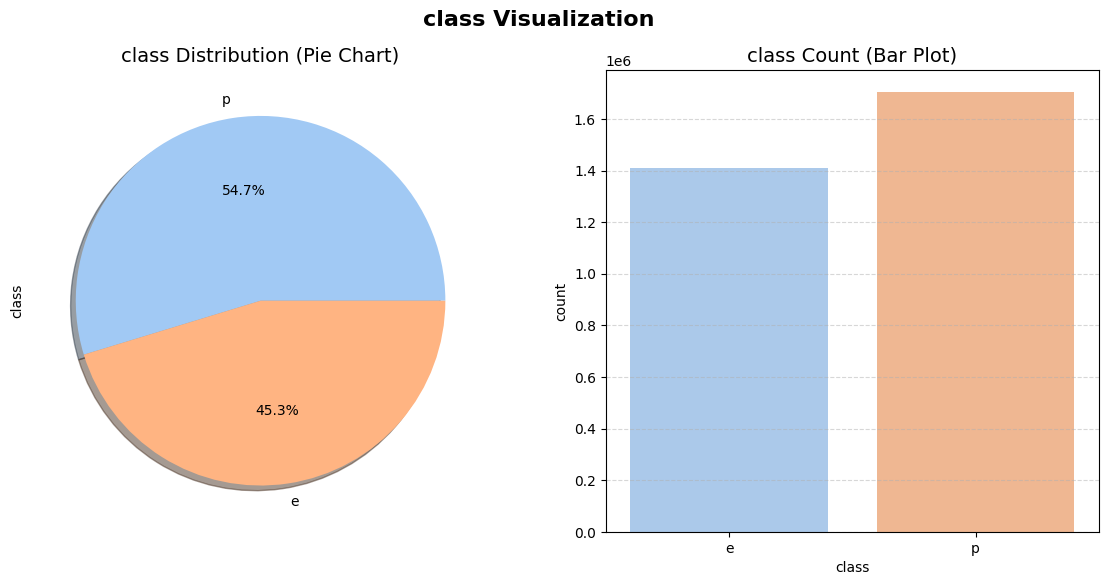

Columns in Target column are: class
p    1705396
e    1411549
Name: count, dtype: int64


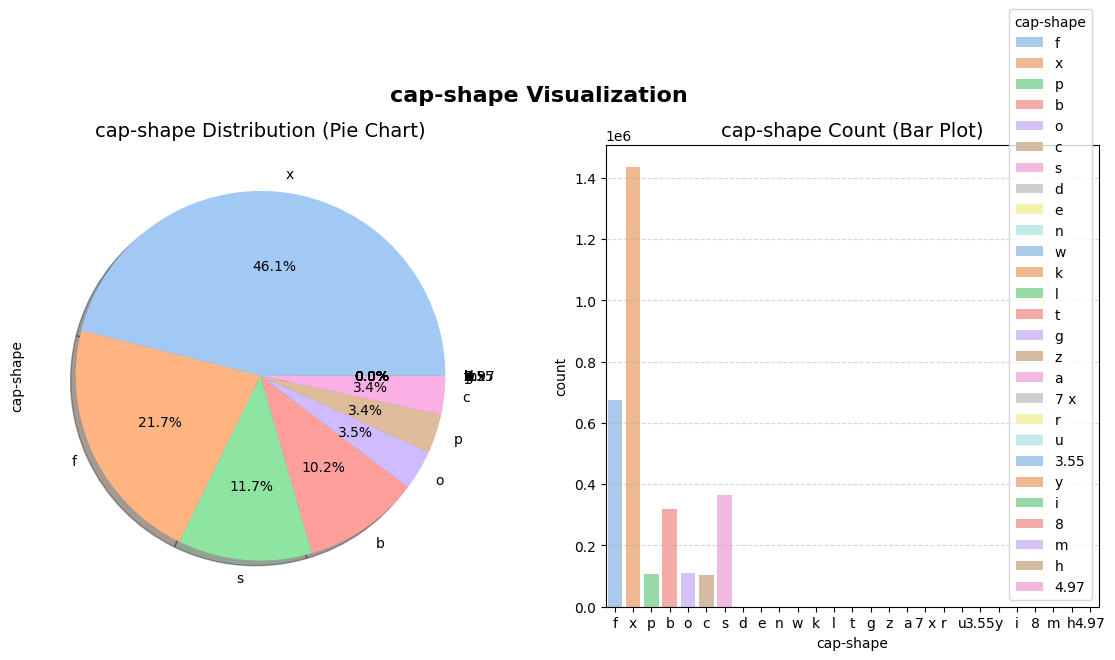

Columns in Target column are: cap-shape
x       1436026
f        676238
s        365146
b        318646
o        108835
p        106967
c        104520
d            65
e            60
n            41
t            36
w            36
g            34
y            33
r            32
a            30
u            27
z            22
l            21
i            14
k            13
h             6
7 x           2
3.55          2
8             2
m             2
4.97          2
Name: count, dtype: int64


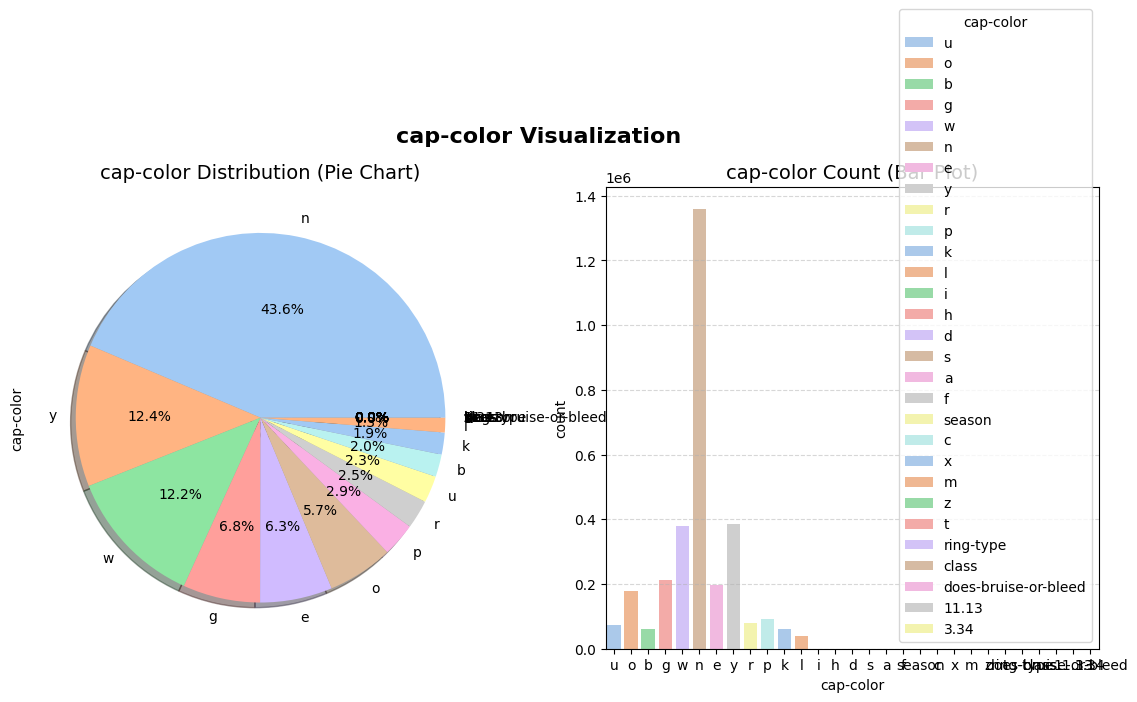

Columns in Target column are: cap-color
n                       1359542
y                        386627
w                        379442
g                        210825
e                        197290
o                        178847
p                         91838
r                         78236
u                         73172
b                         61313
k                         59888
l                         39558
f                            53
d                            48
s                            39
a                            30
t                            26
h                            22
c                            14
x                            14
m                            14
i                            13
z                            10
season                        6
ring-type                     6
class                         5
does-bruise-or-bleed          2
11.13                         2
3.34                          2
Name: count, dtype: int64


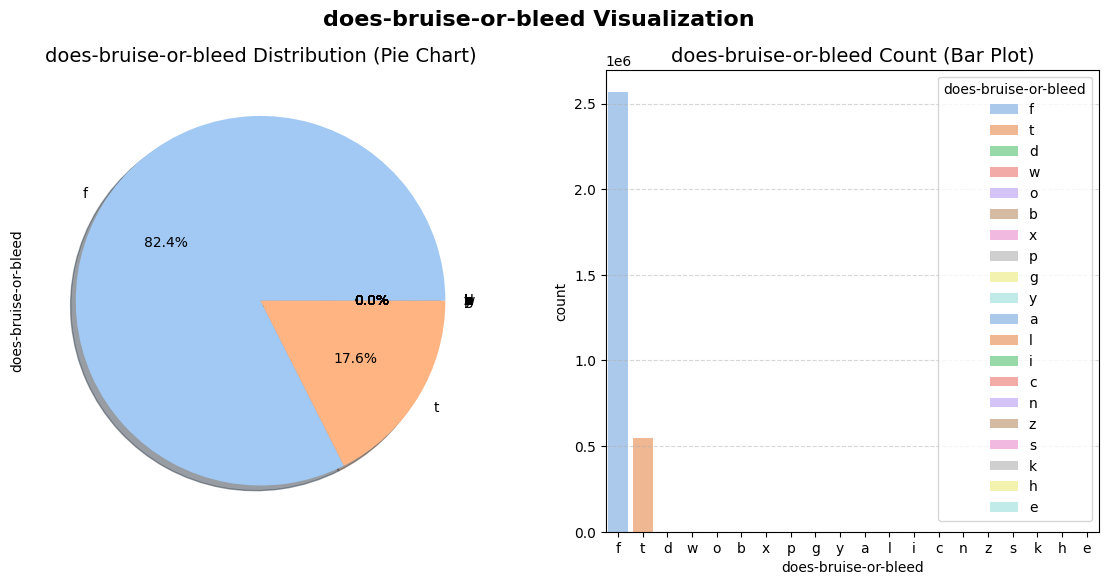

Columns in Target column are: does-bruise-or-bleed
f    2569743
t     547085
w         14
c         11
h          9
y          7
a          7
x          7
b          7
s          6
k          6
p          4
l          4
d          4
e          4
g          3
o          3
z          3
i          2
n          2
Name: count, dtype: int64


KeyboardInterrupt: 

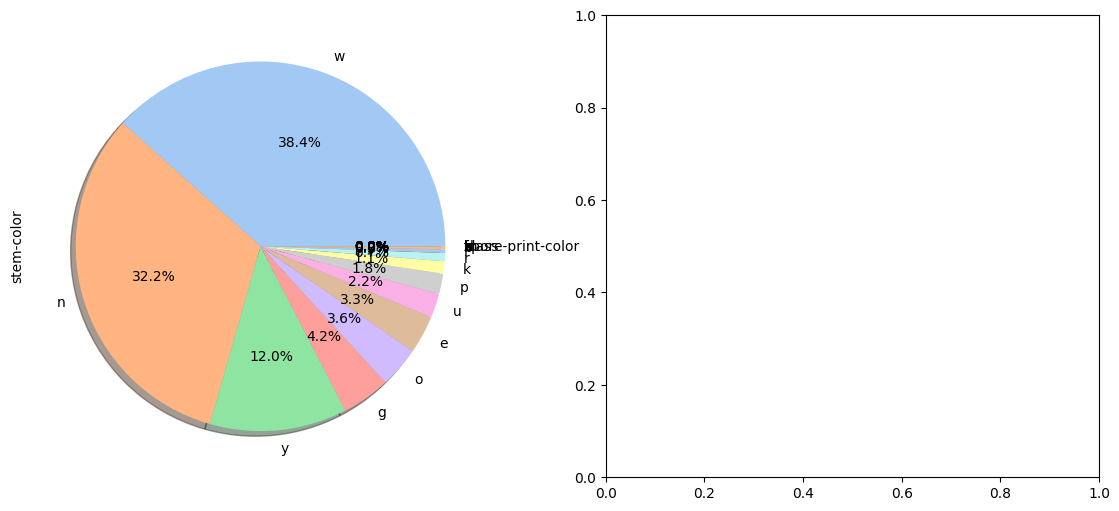

In [ ]:
# @title category feature disturbutions
import warnings
warnings.filterwarnings("ignore")
def target_plot(column,train):
    custom_palette = sns.color_palette("pastel")
    f, ax = plt.subplots(1, 2, figsize=(14,6))
    train[column].value_counts().plot.pie(autopct='%2.1f%%', ax=ax[0], shadow=True, colors=custom_palette)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column, data=train, ax=ax[1], palette=custom_palette,hue=column)
    ax[0].set_title(f'{column} Distribution (Pie Chart)', fontsize=14)
    ax[1].set_title(f'{column} Count (Bar Plot)', fontsize=14)
    plt.suptitle(f'{column} Visualization', fontsize=16, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()
    print("Columns in Target column are:",train[column].value_counts())
for i in cat:
 target_plot(i,train)

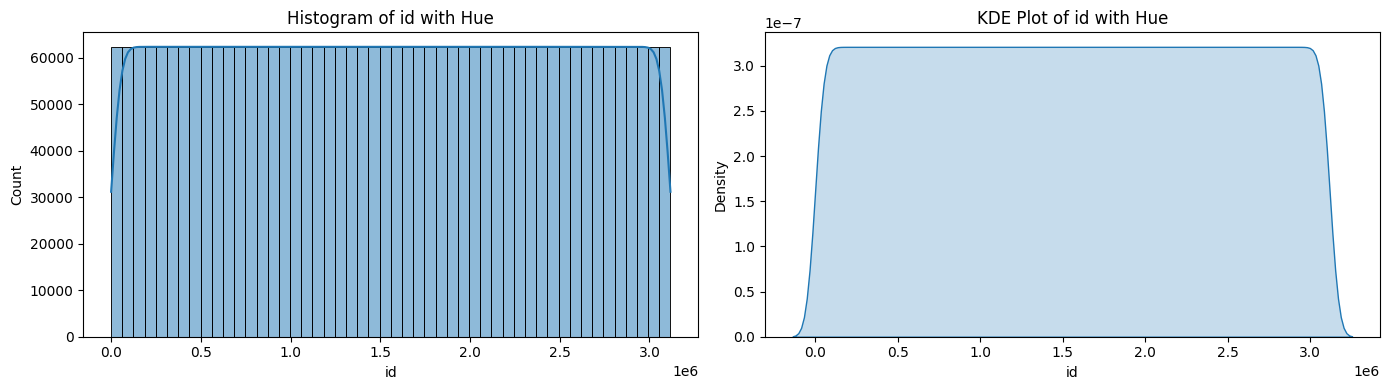

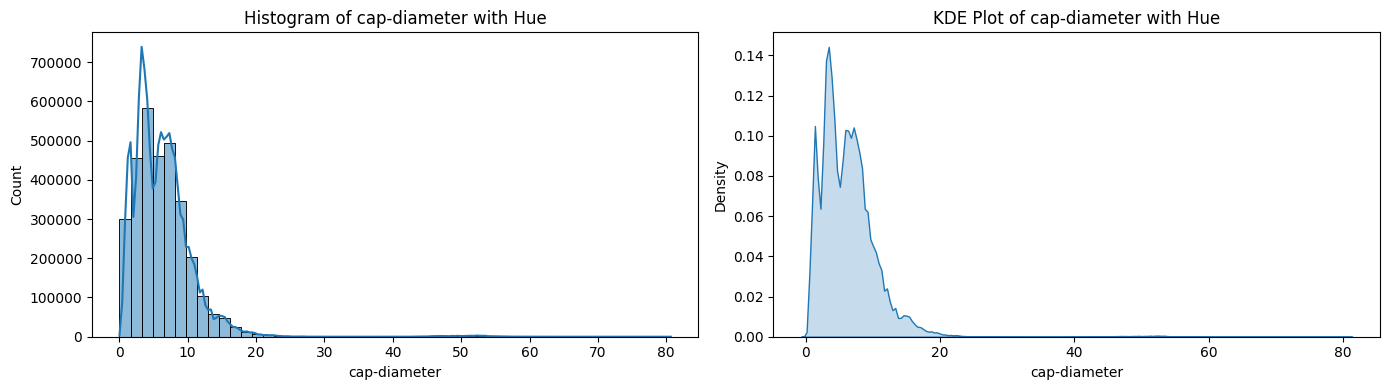

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

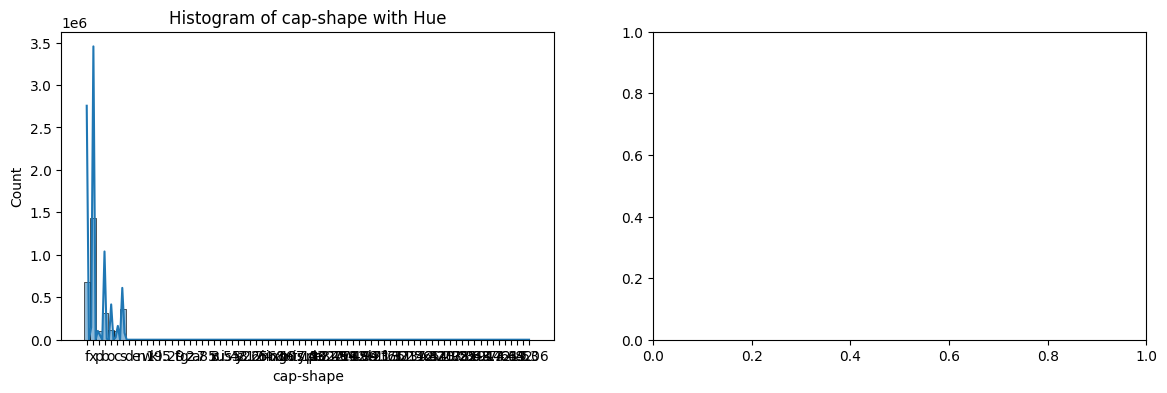

In [ ]:
# @title continous feature disturbutions
def target3_plot(column,train):
      import warnings
      warnings.filterwarnings("ignore")
      hue_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
      fig, axes = plt.subplots(1, 2, figsize=(14, 4))  # Create subplots with 1 row and 2 columns

      # Plot histogram with hue
      sns.histplot(data=train, x=column, hue_order=hue_columns, bins=50, kde=True, ax=axes[0])
      axes[0].set_title(f'Histogram of {column} with Hue')
      axes[0].set_xlabel(column)
      axes[0].set_ylabel('Count')
      # axes[0].legend(title='Fault Types', loc='upper right',fontsize="x-large")

      # Plot KDE plot with hue
      sns.kdeplot(data=train, x=column, shade=True,hue_order=hue_columns, ax=axes[1])
      axes[1].set_title(f'KDE Plot of {column} with Hue')
      axes[1].set_xlabel(column)
      axes[1].set_ylabel('Density')
      # axes[1].legend(title='Fault Types', loc='upper right',fontsize="x-large")

      plt.tight_layout()  # Adjust spacing between subplots
      plt.show()

for i in cont:
   target3_plot(i,train)


In [ ]:
from sklearn import preprocessing

def encoder(data):
  for col in data.columns:
      if data.dtypes[col] == "object":
          le = preprocessing.LabelEncoder()
          le.fit(data[col])
          data[col] = le.transform(data[col])
  return data
x=encoder(x)


In [ ]:
from sklearn.model_selection import train_test_split

xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,shuffle=True,stratify=y )

# @title gaussian
from sklearn.ensemble import HistGradientBoostingClassifier
model=HistGradientBoostingClassifier()

model.fit(xtr,ytr)
model.score(xte,yte)


0.9886475378936748

In [ ]:
train

In [ ]:

l=model.predict(encoder(test.drop('id',axis=1)))
df=pd.DataFrame()
df['class']=l
df['id']=test['id']
df.to_csv("/content/drive/MyDrive/Colab Notebooks/projects/1mushroom/sample_submission.csv", index=False)
